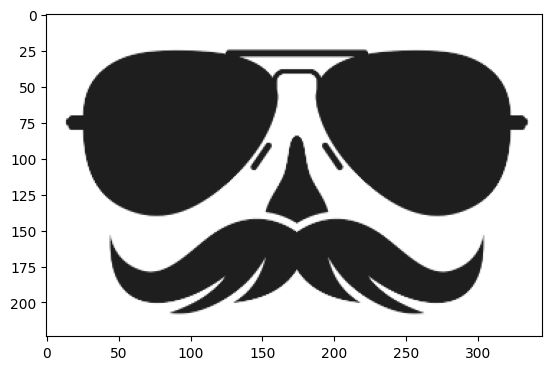

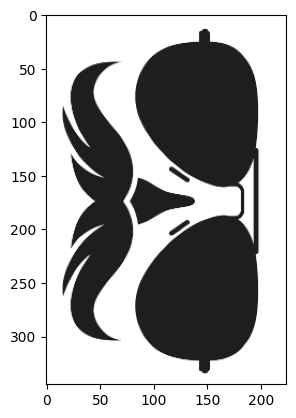

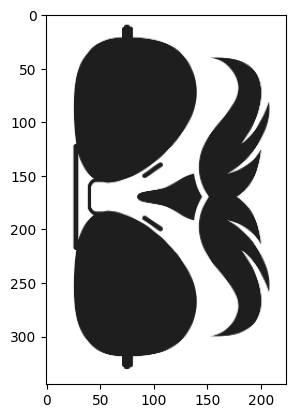

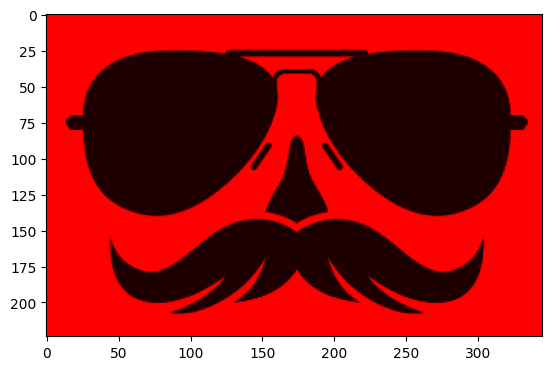

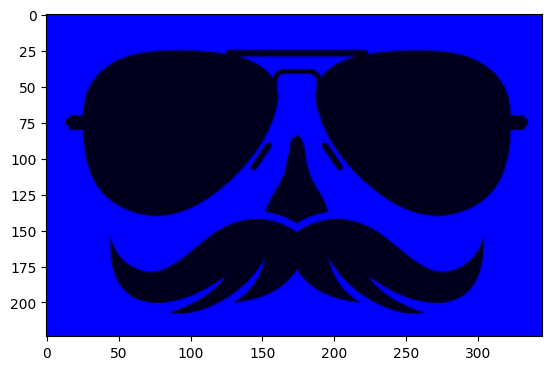

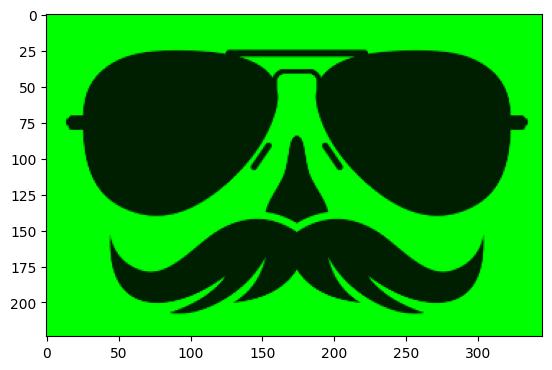

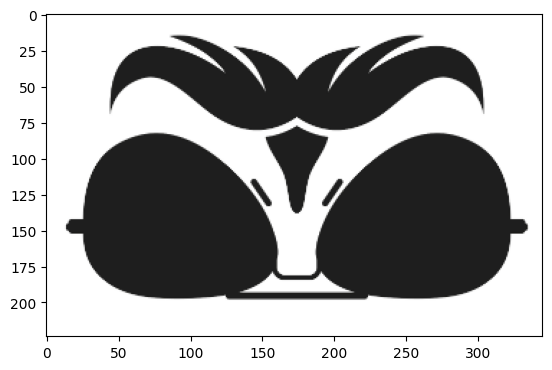

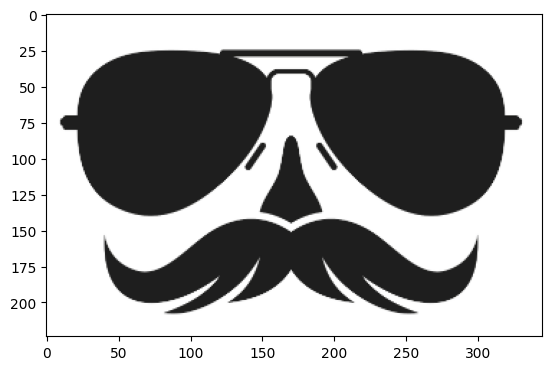

In [69]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

def show(image):
    plt.imshow(image)
    plt.show()

def Red(image):
    image_R = image.copy()
    image_R[:,:,[1,2]] = 0
    return image_R

def Green(image):
    image_G = image.copy()
    image_G[:,:,[0,2]] = 0
    return image_G

def Blue(image):
    image_B = image.copy()
    image_B[:,:,[0,1]] = 0
    return image_B

def counterclockwise(image):
    image_counterclockwise = np.rot90(image)
    return image_counterclockwise

def clockwise(image):
    image_clockwise = np.rot90(image, k=-1)
    return image_clockwise

def flip_y(image):
    image_y = np.flip(image, 1)
    return image_y

def flip_x(image):
    image_x = np.flip(image, 0)
    return image_x

def reorder(image, sequences):
    image_reorder = np.concatenate((np.split(image, sequences, axis=1)), axis = 0)
    return image_reorder

#Relative image path
loc_input_img = "Foto/cool.png"

image = Image.open(loc_input_img)

# Convert the image to a NumPy array
image = np.array(image)

show(image)
show(clockwise(image))
show(counterclockwise(image))
show(Red(image))
show(Blue(image))
show(Green(image))
show(flip_x(image))
show(flip_y(image))

